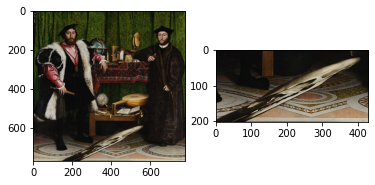

In [1]:
from skimage import io
from skimage import transform
import matplotlib.pyplot as plt
import numpy as np
import cv2

a = io.imread('The_Ambassadors.jpg')
#框出骷髏頭的位置
skull = a[566:768,157:586]
fig = plt.figure()
#plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side

ax1.imshow(a)
ax2.imshow(skull)

plt.show()

In [2]:
def unwarp(img, src, dst, testing):
    h, w = img.shape[:2]
    # 使用 cv2.getPerspectiveTransform() 得到轉換矩陣M
    M = cv2.getPerspectiveTransform(src, dst)
    # 使用 cv2.warpPerspective() 對圖像做從上至下的映射
    warped = cv2.warpPerspective(img, M, (w, h), flags=cv2.INTER_LINEAR)

    if testing:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
        f.subplots_adjust(hspace=.2, wspace=.05)
        ax1.imshow(img)
        x = [src[0][0], src[2][0], src[3][0], src[1][0], src[0][0]]
        y = [src[0][1], src[2][1], src[3][1], src[1][1], src[0][1]]
        ax1.plot(x, y, color='red', alpha=0.4, linewidth=3, solid_capstyle='round', zorder=2)
        ax1.set_ylim([h, 0])
        ax1.set_xlim([0, w])
        ax1.set_title('Original Image', fontsize=30)
        ax2.imshow(cv2.flip(warped, 1))
        ax2.set_title('Distortion Correction Result', fontsize=30)
        plt.show()
    else:
        return warped, M

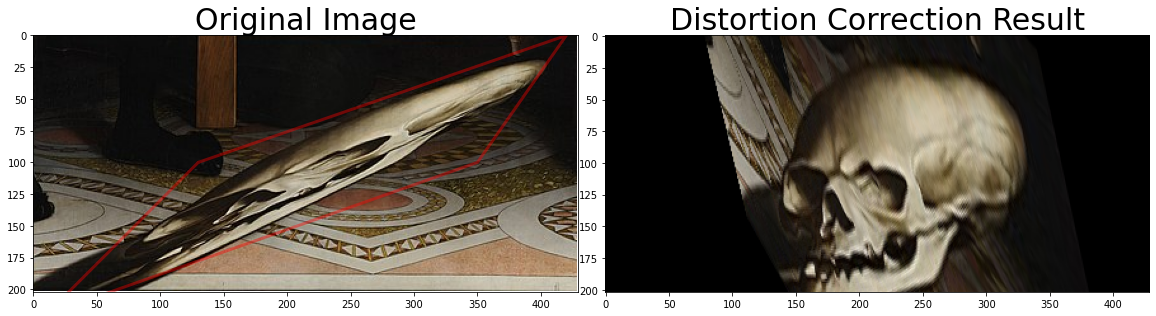

In [3]:
w, h = skull.shape[0], skull.shape[1]
# We will first manually select the source points
# we will select the destination point which will map the source points in
# original image to destination points in unwarped image
#手動輸入來源得位址資料
src = np.float32([(130,100),
                  (420,0),
                  (10,220),
                  (350,100)])
#輸入參數
dst = np.float32([(300,0),
                  (100,0),
                  (300,200),
                  (100,300)])
unwarp(skull, src, dst, True)
